#### 분류 평가
- TP, FP, FN, TN는 예측 클래스와 실제 클래스의 Positive 결정 값과 Negative 결정 값의 결합에 따라 결정
- 앞문자 True, False는 예측값과 실제 값이 같은가 틀린가를 의미하고 뒤 문자 Negative/Positive는 예측 결과 값이 부정 긍정을 의미
- TN는 예측값을 Negative 값 0으로 예측했고 실제값 역시 Negative 값 이
- FP는 예측값을 Positive 값 1로 예측했고 실제 값은 Negative 값 이
- FN은 예측값을 Negative 값 0으로 예측했고 실제 값은 Positive 값 1
- TN는 예측값을 Positive 값 1로 예측했고 실제값 역시 Positive 값 1
- 정확도 = (TP + TN) / ( TP + TN + FP + FN)
- 정밀도 = TP / ( TP + FP)
- 재현율 = TPI (TP + FN) : 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼때 높아짐.
- F1 = 2 * ( 정밀도 * 재현을) / (정밀도 + 재현율)
- 정밀도와 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표
- 재현율이 중요 지표인 경우는 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우(ex. 보험사기, 암진단)

#### 정밀도/제현율 트레이드오프
* 정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 결정 임곗값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있음
* 정밀도와 재현율은 한쪽을 높이면 다른 하나의 수치는 낮아지므로 트레이드오프(Trade-off) 관계임

#### 예측 확률을 반환하는 predict_proba()
* 사이킷런 분류 알고리즘은 예측 데이터가 특정 레이블(결정 클래스 값)에 속하는지를 계산하기 위해 먼저 개별 레이블별로 결정 확률을 구함
* 그리고 예측 확률이 큰 레이블 값으로 예측
* 이진 분류 모델에서 특정 데이터가 0이 될 확률이 10%, 1이 될 확률이 90%로 예측되었다면 최종 예측은 더 큰 확률을 가진 1로 예측
* 이진 분류에서는 이 임곗값을 0.5로 정하고 이 기준 값보다 확률이 크면 Positive, 작으면 Negative로 결정함
* 사이킷런은 개별 데이터별로 예측 확률을 반환하는 메서드인 predict_prob()를 제공 - 학습이 완료된 사이킷런 Classifier 객체에서 호출
* predict() 메서드와 유사하지만 단지 반환 결과가 예측 결과 클래스값이 아닌 예측 확률 결과임

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

titanic_df = pd.read_csv('../Data/train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
# 일괄 전처리 사용자 함수(null 처리, 불필요 칼럼 삭제, 레이블 인코딩) 
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
# Age(평균), Cabin('N'), Embarked('N'), Fare(0)
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
# PassengerId, Name, Ticket(티켓번호)
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행.
# Cabin(선실번호 첫문자만 추출 후 인코딩), Sex(성별), Embarked(중간 정착 항구)
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [22]:
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                   test_size=0.2, random_state=11)

lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
accuracy_lr = accuracy_score(y_test,pred)
accuracy_lr

0.8491620111731844

In [23]:
y_df = titanic_df['Survived']
X_df= titanic_df.drop('Survived',axis=1)
X_df= transform_features(X_df)

X_train, X_test, y_train, y_test= train_test_split(X_df,y_df,
                                                  test_size=0.2,random_state=11)

In [24]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
# print(type(pred_proba[:3]))
print(pred_proba[:3])
print()
print(pred.reshape(-1,1)[:3])

[[0.46162417 0.53837583]
 [0.87858538 0.12141462]
 [0.87723741 0.12276259]]

[[1]
 [0]
 [0]]


In [25]:
from sklearn.preprocessing import Binarizer

X = [[1,-1,2],
     [2,0,0],
     [0,1.1,1.2]]

# Binarizer (threshold ) : threshold 기준값보다 같거자 작으면 0, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [26]:
custom_threshold = 0.5
print("pred_proba: \n", pred_proba[:5])
print()
# 생존 확률 추춣 후 2차원 배열로 전환
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
print('생존확률 \n', pred_proba_1[:5])
print()
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
print(custom_predict[:5])

pred_proba: 
 [[0.46162417 0.53837583]
 [0.87858538 0.12141462]
 [0.87723741 0.12276259]
 [0.8828518  0.1171482 ]
 [0.85504601 0.14495399]]

생존확률 
 [[0.53837583]
 [0.12141462]
 [0.12276259]
 [0.1171482 ]
 [0.14495399]]

[[1.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [27]:
# get_clf_eval 평가 사용자 정의 함수
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [28]:
def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {:.4f}, 정밀도: {:.4f}, 재현율: {:.4f}, f1: {:.4f}'.format(accuracy,precision,
                                                                    recall,f1))
get_clf_eval(y_test,custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, f1: 0.7805


In [29]:
# #계산
# 정확도 = (TP + TN) / ( TP + TN + FP + FN)
# 정밀도 = TP / ( TP + FP)
# 재현율 = TPI (TP + FN)
# f1 = 2* (정밀도 * 재현율) / (정밀도 + 재현율)

#오차행렬
# TN / FP
# FN / TP

TP = 48
TN = 104
FP = 14
FN = 13

정확도 = (TP + TN) / ( TP + TN + FP + FN) # accuracy
정밀도 = TP / (TP + FP) #precision
재현율 = TP / (TP + FN)  # TPI recall
f1 = 2 * (정밀도 * 재현율) / (정밀도 + 재현율)

print('정확도', 정확도)
print('정밀도', 정밀도)
print('재현율', 재현율)
print('f1', f1)



정확도 0.8491620111731844
정밀도 0.7741935483870968
재현율 0.7868852459016393
f1 0.7804878048780488


In [30]:
from sklearn.metrics import plot_confusion_matrix

In [33]:
plot_confusion_matrix(y_test,pred)

TypeError: plot_confusion_matrix() missing 1 required positional argument: 'y_true'

In [34]:
Label = np.unique([y_test, pred])
confustion_matrix = pd.DataFrame(
    confusion_matrix(y_test, pred, labels=Label), 
    index=['true:{:}'.format(x) for x in Label], 
    columns=['pred:{:}'.format(x) for x in Label])
print(confustion_matrix)

        pred:0  pred:1
true:0     104      14
true:1      13      48


In [43]:
#임계값이 커지면 양성 예측이 적어지므로 FP가 적어지고 정밀도가 증가한다.
#정밀도와 재현율은 trade-off 관계로 정밀도가 증가하면 재현율은 낮아진다.ㅔ

thresholds = [0.4,0.45,0.50,0.55,0.60]

def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    #thresholds list 객체내의 값을 차례로 iteration하면서 evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값', custom_threshold)
        get_clf_eval(y_test,custom_predict)
        print()
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1),thresholds)
    

임계값 0.4
오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361, f1: 0.7786

임계값 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033, f1: 0.7840

임계값 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, f1: 0.7805

임계값 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541, f1: 0.7931

임계값 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377, f1: 0.8036



### 결과해석
- 임계값이 낮을수록 많은 수의 양성 예측으로 인해 재현율 값이 극도로 높아지고 정밀도 값이 낮아짐 ( FN 이 작아지고 FP가 커진다)
- 로지스틱 회귀 기반의 타이타닉 생존자 예측 모델의 경우 임계값이 약 0.5 지점에서 재현율과 정밀도가 비슷해지는 모습을 보인다.
- 단순히 하나의 성능 지표 수치를 높이기 위한 수단으로 사용하는 것은 지양하고 업무 환경에 맞게 두 개의 수치를 상호 보완할 수 있는 수준에서 적용한다.

### 정밀도 및 재현율 활용시 유의 사항
- 정밀도와 재현율 성능 수치는 어느 한쪽만 참조하면 극단적인 수치 조작이 가능하다.
- 정밀도 100%가 되는 방법: 확실한 기준이 되는 경우만 Postive 로 예측하고 나머지 모두 Negative로 예측.

- 전체 환자 1000명 중 확실한 Positive 징후만 가진 환자는 단 1명이라고 하면 이 한명만 P로 예측하고 나머지는 모두 N으로 예측 FP는 0, TP는 1이 되며 정밀도 (TP/(TP+FP)는 1/(1+0) = 1

- 재현율이 100%가 되는 방법 : 모든 환자를 Postive로 예측 1000명의 환자 중 실제 양성인 사람이 30명 정도라도 TN이 수치에 포함되지 않고 FN은 0이므로 재현율(TP/(TP+FN) 은 30/(30+0) = 1
- 분류가 정밀도, 재현율 중 하나에 상대적인 중요도를 부여할 수 있지만 하나만 강조해서는 안됨.
- 암 예측 모델에서 재현율을 높인다고 주로 양성만 판정한다면 환자의 부담과 불평이 커지게 된다. 

### ROC 곡선과 AUC
- 수신자 판단 곡선이라고 하며 머신러닝의 이진 분류 모델의 예측 성능을 판단하는 중요한 평가 지표.
- FPR이 변할 때 TPR이 어떻게 변하는지를 나타내는 곡선으로 FPR은 1- 특이성(TNR), TPR은 재현율(민감도)를 나타낸다.
- TNR은 TN/(TN+FP)이며 FPR은 FP/(TN+FP)이다.
- ROC 곡선은 FPR을 0 부터 1 까지 변경하면서 FPR을 구하고 이 FPR값의 변화에 따른 TPR의 변화 값을 구함
- FPR을 0 ㅇ에서 1까지 변경하는 것은 Poistive 예측값을 결정하는 기준인 분류 결정 임계값을 변경하면 된다.
- FPR을 0으로 만들려면 임곗값을 1로 지정하고 반대로 FPR을 1로 만들려면 임계값을 0으로 지정하면 된다


In [54]:
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                   test_size=0.2, random_state=11)

lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
accuracy_lr = accuracy_score(y_test,pred)
accuracy_lr

0.8491620111731844

In [53]:
from sklearn.metrics import roc_curve
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
fprs, tprs, thresholds = roc_curve(y_test,pred_proba_c1)
thr_index = np.arange(1,thresholds.shape[0],5)
print(np.round(thresholds[thr_index],2))
print(np.round(fprs[thr_index],2))
print(np.round(tprs[thr_index],2))
print(thr_index)

[0.97 0.65 0.63 0.56 0.45 0.38 0.31 0.13 0.12 0.11 0.1 ]
[0.   0.02 0.03 0.08 0.13 0.19 0.24 0.58 0.62 0.75 0.81]
[0.03 0.64 0.7  0.75 0.8  0.85 0.9  0.9  0.95 0.97 1.  ]
[ 1  6 11 16 21 26 31 36 41 46 51]


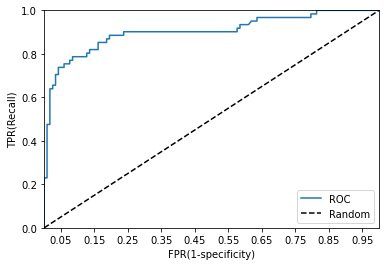

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
def roc_curve_plot(y_test,pred_proba_c1):
    fprs,tprs,thresholds = roc_curve(y_test,pred_proba_c1)
    plt.plot(fprs,tprs,label='ROC')
    plt.plot([0,1],[0,1], 'k--', label = "Random")
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2)) #축 단위 뽑음
    plt.xlim(0,1) 
    plt.ylim(0,1)
    plt.xlabel('FPR(1-specificity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()
roc_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])
    
    

In [63]:
from sklearn.metrics import roc_auc_score
pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test,pred_proba)
print('ROC AUC 값 : {:.4f}'.format(roc_score))

## ROC 는 이진 분류형 (0,1)에 만 사용이 가능하다.

ROC AUC 값 : 0.9024


In [67]:
# get_clf_eval 평가 사용자 정의 함수
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

def get_clf_eval(y_test,pred,pred_proba):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test,pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {:.4f}, 정밀도: {:.4f}, 재현율: {:.4f}, f1: {:.4f}, auc:{:.4f}'.format(accuracy,precision,
                                                                    recall,f1,roc_auc))
    
get_clf_eval(y_test,pred,pred_proba)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, f1: 0.7805, auc:0.9024


In [69]:
# 과제
# 아래를 적용하여 교차검증과 성능 개선을 위한 하이퍼파라미터 튜닝을 수행하여 최적의 모델을 생성한 후 평가하세요.
# 단 평가는 분류 평가지표 모두를 포함하는 사용자 함수를 작성하여 수행하세요
#[파라미터]
# Q. classifier - DecisionTreeClasifier, cv =5 , scoring = 'accuracy'
# Parms = [max_depth, min_samples_split, min_samples_leaf] customize the options
# [2,3,5,10]  [2,3,5]  [1,5,8]


In [ ]:
# Least 30 minutes
from sklearn.model_selection import GridSearchCV
params = {
    #몇개의 분류기
    'n_estimators' : [100,200],
    'learning_rate': [0.05,0.1]
}
grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=5, verbose=1)
grid_cv.fit(X_train,y_train)
grid_cv.pred = grid_cv.predict(X_test)
print('최적 하이퍼 파라미터: \n',
     grid_cv.best_params_)
print("최고 예측 정확도 : {:.4f}".format(grid_cv.best_score_))
#직접 입력하는것이 하이퍼 파라미터/
#파라미터는 